# **Machine Learning Models for Heart Disease Diagnosis**

## Objective
This study aims to implement supervised machine learning algorithms to efficiently predict the presence of heart disease based on various patient symptoms and health indicators. By leveraging a comprehensive dataset that includes demographic information, symptom descriptions, and diagnostic metrics, the goal is to develop predictive models that can accurately identify individuals at risk for heart disease. The study will focus on comparing the performance of different machine learning techniques, evaluating their accuracy and effectiveness, and providing insights into which factors most significantly influence the prediction of heart disease.

### Approach
- **Gathering the Data:** Data preparation is a crucial initial step in any machine learning project. For this study, we will use a dataset obtained from Kaggle, which is provided in a single CSV file. This dataset contains 303 examples and 14 columns. Out of these, 13 columns represent various patient symptoms and health indicators, while the final column serves as the target variable, indicating whether the patient has heart disease or not. Effective preparation and preprocessing of this data will be essential for building accurate and reliable predictive models.

- **Preprocessing the Data:** Preprocessing is a critical step in any machine learning project, as the quality of the data directly impacts the performance of the model. It is essential to clean and preprocess the data thoroughly before using it for training.  
In our dataset:
   1. `Data Types:` All columns have the correct data types, but some preprocessing is required.
   2. `Categorical Features:` These need to be encoded using OneHotEncoder and OrdinalEncoder to convert categorical variables into numerical format suitable for machine learning models.
   3. `Numeric Features:` These will be scaled using StandardScaler to normalize the data and ensure that all features contribute equally to the model.
   4. `Target Variable:` The target column, which represents the prognosis, will be encoded into numerical form using LabelEncoder.

- **Model Building:** After gathering and cleaning the data, it is now ready for training machine learning models. We will use the cleaned data to train and evaluate several algorithms, including:

   1. _Support Vector Classifier (SVC)_
   2. _Logistic Regression_
   3. _Random Forest Classifier_
  
  To assess the performance of these models, we will employ various evaluation metrics and strategies, such as:

   - `Accuracy Score:` Measures the proportion of correctly classified instances.
   - `Recall score:` Indicates the model’s ability to identify all relevant instances.
   - `Precision score:` Reflects the accuracy of the positive predictions made by the model.
   - `F1 Score:` Provides a balanced measure of precision and recall.
   - `Confusion Matrix:` Visualizes the performance of the classification model by showing the true positives, true negatives, false positives, and false negatives.  
   - `ROC Curve:` Evaluates the model’s performance across different thresholds, showing the trade-off between true positive rate and false positive rate.  
  
  These metrics will help in comparing the models and selecting the one that best meets the prediction requirements for heart disease diagnosis.

- **Inference:** Once the models have been trained and evaluated, the next step is to use them for making predictions on new or unseen data. Inference involves applying the trained machine learning models to new instances to predict whether a patient is at risk of heart disease based on their symptoms and health indicators.


In [1]:
# Importing libraries
import pandas as pd, numpy as np, seaborn as sb, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay

## Reading the Dataset
The first step is to load the dataset using the Pandas library. This dataset is already clean, with no missing values, and all features have the appropriate data types. This ensures that the data is ready for further processing and analysis without requiring additional cleaning steps.

In [2]:
df = pd.read_csv('C:/Users/Mariwan/OneDrive/Desktop/heart_disease.csv')
print(f'Number of samples: {df.shape[0]}\nNumber of columns: {df.shape[1]}\nMissing values: {df[df.isnull().any(axis=1)].shape[0]}\n')
df.head()

Number of samples: 303
Number of columns: 14
Missing values: 0



,age,sex,chest pain,trestbps,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,True,False,150,False,2.3,upsloping,No vessels colored,Normal,Yes
1,37,Male,Non-anginal pain,130,250,False,True,187,False,3.5,upsloping,No vessels colored,Fixed Defect,Yes
2,41,Female,Atypical angina,130,204,False,False,172,False,1.4,downsloping,No vessels colored,Fixed Defect,Yes
3,56,Male,Atypical angina,120,236,False,True,178,False,0.8,downsloping,No vessels colored,Fixed Defect,Yes
4,57,Female,Typical angina,120,354,False,True,163,True,0.6,downsloping,No vessels colored,Fixed Defect,Yes


**Data Describtion**  

- `age:` Age of the patient in years.
- `sex:` Gender of the patient.
- `chest pain:` Type of chest pain experienced by the patient.
   - 0: Typical angina (chest pain related to decreased blood supply to the heart)
   - 1: Atypical angina (chest pain not related to the heart)
   - 2: Non-anginal pain (typically esophageal spasms, not heart-related)
   - 3: Asymptomatic (chest pain not showing signs of disease)
- `trestbps:` Resting blood pressure in mm Hg upon admission to the hospital.
- `cholesterol:` Serum cholesterol level in mg/dl. This includes LDL, HDL, and 0.2 times triglycerides.
- `fbs:` Fasting blood sugar level (greater than 120 mg/dl). 1: True (Fasting blood sugar > 120 mg/dl) and 0:False.
- `restecg:` Results of the resting electrocardiogram. 0: Nothing to note and 1: ST-T Wave abnormality.
- `thalach:` The maximum heart rate achieved during exercise.
- `exang:` Whether the patient experienced angina (chest pain) induced by exercise. 1:Yes and 0:No.
- `oldpeak:` ST depression induced by exercise relative to rest, indicating the level of stress.
- `slope:` The slope of the peak exercise ST segment, indicating the heart’s response to exercise.
   - 0: Upsloping (better heart rate response with exercise, uncommon).
   - 1: Flatsloping (minimal change, typical in a healthy heart).
   - 2: Downsloping (signs of an unhealthy heart)
- `ca:` The number of major coronary vessels (ranging from 0 to 3) colored by fluoroscopy. Colored vessels indicate visible blood flow.
- `thal:` Results from a thallium stress test. 0:Normal, 1:Fixed defect and 2:Reversible defect
- `target:` Indicates whether the patient has heart disease. 1:Yes and 0:No


## Data Visualization
In this section, we will visualize the features and the target variable to gain insights into the data. The visualizations will help us understand the distribution of the features and assess whether the target variable has balanced classes. By exploring the data visually, we can identify patterns, potential outliers, and the overall structure, which will inform the subsequent steps in our analysis and modeling process.

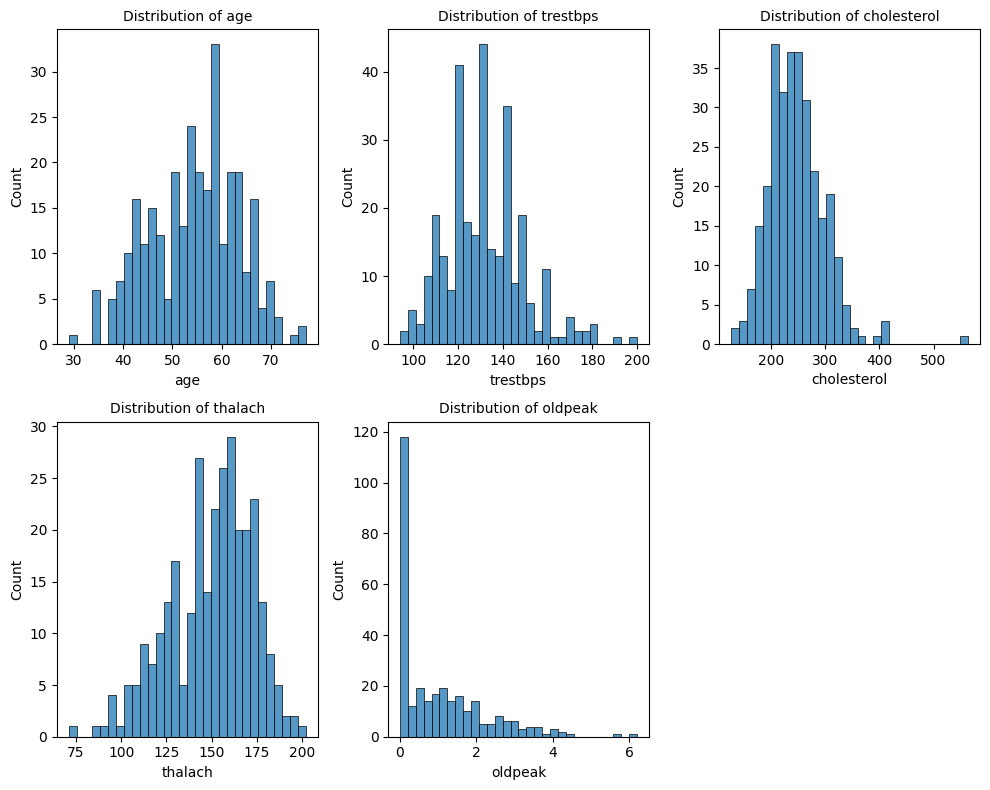

In [3]:
numeric_cols = df.select_dtypes(include='number')
x = 0
plt.figure(figsize=(10, 8), layout='tight')
for col in numeric_cols.columns:
    x += 1
    plt.subplot(2, 3, x)
    sb.histplot(numeric_cols, x=col, bins=30)
    plt.title(f'Distribution of {col}', size=10)
plt.show()
    

From the above plots, it appears that the features Age, trestbps (resting blood pressure), cholesterol, and thalach (maximum heart rate achieved) exhibit distributions that could significantly contribute to the model's performance. In contrast, the oldpeak feature does not seem to show a clear pattern that might be useful for distinguishing between classes, suggesting it may have a lesser impact on the model’s predictions.

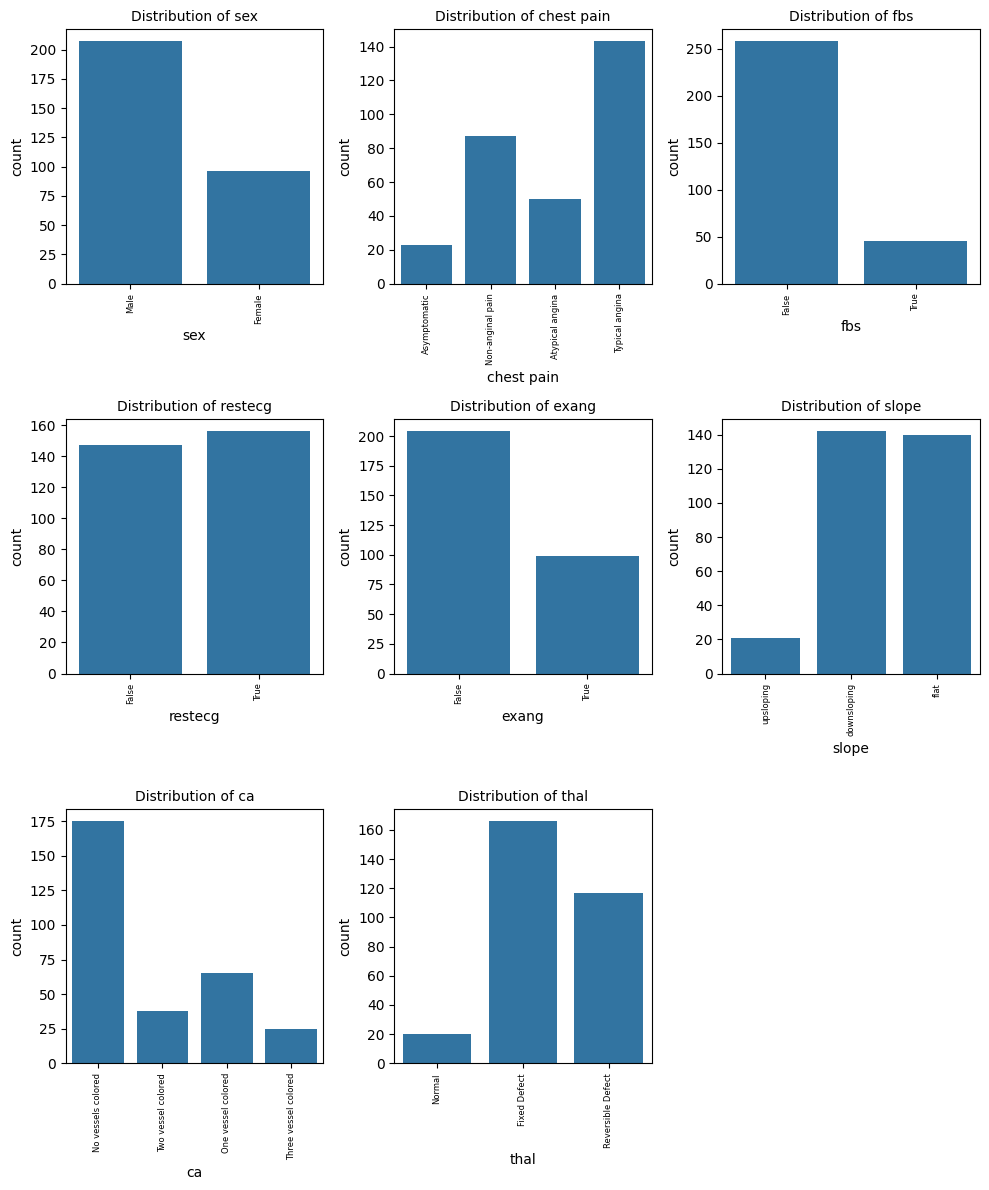

In [4]:
categories_cols = df.drop(columns='target').select_dtypes(exclude='number')
x = 0
plt.figure(figsize=(10, 12), layout='tight')
for col in categories_cols.columns:
    x += 1
    plt.subplot(3, 3, x)
    sb.countplot(categories_cols, x=col)
    plt.xticks(rotation=90, size=6)
    plt.title(f'Distribution of {col}', size=10)
plt.show()


From the above plots, it is evident that certain categorical features with imbalanced categories, such as sex, chest pain, fbs (fasting blood sugar), slope (of the peak exercise ST segment), ca (number of major vessels colored by fluoroscopy), and thal (thalium stress test result), have a notable influence on the model's performance. The imbalance in these categories may play a crucial role in the model's ability to differentiate between cases, impacting the prediction accuracy and overall effectiveness of the model.

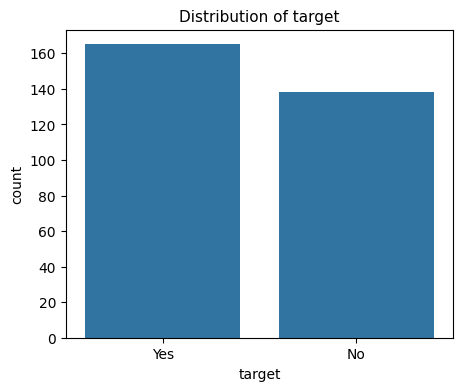

In [5]:
plt.figure(figsize=(5, 4))
sb.countplot(df, x='target')
plt.title('Distribution of target', size=11)
plt.show()

The above bar chart shows that the classes are relatively balanced, but there is a slight majority in the Yes class.

## Data Preprocessing
To prepare the data for modeling, we will perform several preprocessing steps. The categorical features will be encoded using appropriate techniques: OneHotEncoder will be applied to binary and nominal features, while OrdinalEncoder will be used for ordinal features. The target variable will be encoded using LabelEncoder to convert the categorical target labels into numeric form. Additionally, the numeric features will be standardized using StandardScaler to ensure that they have a mean of 0 and a standard deviation of 1, which is essential for many machine learning algorithms to perform optimally.

In [6]:
# Encoding binary columns
binary_cols = OneHotEncoder(sparse_output=False, dtype=int, drop='if_binary').fit_transform(df[['sex', 'fbs', 'restecg', 'exang']])
binary_df = pd.DataFrame(binary_cols, columns=['sex', 'fbs', 'restecg', 'exang'])

# Encoding nominal columns
nominal_col = OneHotEncoder(sparse_output=False, dtype=int)
nominal_trans = nominal_col.fit_transform(df[['ca']])
nominal_df = pd.DataFrame(nominal_trans, columns=nominal_col.get_feature_names_out()).rename(columns={'ca_No vessels colored':'No vc', 
                                                                                                     'ca_One vessel colored':'One vc', 
                                                                                                     'ca_Two vessel colored':'Two vc',
                                                                                                     'ca_Three vessel colored':'Three vc'})

# Encoding ordinal columns
# Encoding chest pain
ordinal_col1 = OrdinalEncoder(dtype=int, categories=[['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']])
chest_pain = pd.DataFrame(ordinal_col1.fit_transform(df[['chest pain']]), columns=['chest_pain'])
# Encoding slope 
ordinal_col2 = OrdinalEncoder(dtype=int, categories=[['upsloping','flat', 'downsloping']])
slope = pd.DataFrame(ordinal_col2.fit_transform(df[['slope']]), columns=['slope'])
# Encoding thal
ordinal_col3 = OrdinalEncoder(dtype=int, categories=[['Normal', 'Fixed Defect', 'Reversible Defect']])
thal = pd.DataFrame(ordinal_col3.fit_transform(df[['thal']]), columns=['thal'])
# Concatenating all encoded ordinal columns
ordinal_df = pd.concat([chest_pain, slope, thal], axis=1)

# Encoding target
label = LabelEncoder().fit_transform(df['target'])
target = pd.DataFrame(label, columns=['target'])

# Scaling numeric columns
numeric_cols = df.select_dtypes(include='number')
numeric_scale = StandardScaler().fit_transform(numeric_cols)
numeric_df = pd.DataFrame(numeric_scale, columns=numeric_cols.columns)

# Combining all transformed and encoded columns
df_trans = pd.concat([numeric_df, binary_df, ordinal_df, nominal_df, target], axis=1)
df_trans.head()

,age,trestbps,cholesterol,thalach,oldpeak,sex,fbs,restecg,exang,chest_pain,slope,thal,No vc,One vc,Three vc,Two vc,target
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,3,0,0,1,0,0,0,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,2,0,1,1,0,0,0,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,0,1,2,1,1,0,0,0,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,2,1,1,0,0,0,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,1,1,0,2,1,1,0,0,0,1


## Data Splitting
Now that we have preprocessed our data by converting labels to numerical format and scaling the numeric features, it’s time to split the dataset into training and testing subsets. We will divide the data using a __70:30 split__, where 70% of the dataset will be used for training the model, and 30% will be reserved for evaluating the model's performance. This split allows us to train the model on a substantial portion of the data while retaining a separate set of data to assess how well the model generalizes to unseen instances.


In [7]:
X = df_trans.drop(columns='target')
y = df_trans['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
print(f'train: {X_train.shape}, {y_train.shape}')
print(f'test:  {X_test.shape}, {y_test.shape}')

train: (212, 16), (212,)
test:  (91, 16), (91,)


## Model Building
After splitting the data, we will proceed with the model building phase. We will employ K-Fold Cross-Validation to evaluate the performance of our machine learning models. This technique involves dividing the training data into k subsets or folds, shuffling the data, and then training and validating the model k times, each time using a different fold as the validation set and the remaining folds as the training set. This helps in assessing the model's performance more robustly and reducing the risk of overfitting.<br>

We will be using the following models for evaluation:
- __Support Vector Classifier (SVC)__
- __Logistic Regression__
- __Random Forest Classifier__

Before implementing these models, we will familiarize ourselves with K-Fold Cross-Validation and the specifics of each machine learning model to ensure a comprehensive understanding and effective application.<br>

**K-Fold Cross-Validation**  
K-Fold Cross-Validation is a robust technique used to evaluate the performance of a machine learning model. In this method, the entire dataset is divided into k equally-sized subsets, known as folds. The model is trained k times, each time using k-1 of these folds as the training set and the remaining one fold as the validation set. This process ensures that each subset is used as a validation set exactly once, allowing for a comprehensive evaluation of the model's performance across different subsets of the data. K-Fold Cross-Validation helps in obtaining a more reliable estimate of the model's performance and reduces the likelihood of overfitting.<br>

**Support Vector Classifier (SVC)**  
The Support Vector Classifier is a type of discriminative classifier that aims to find the optimal hyperplane that best separates different classes in the feature space. Given labeled training data, SVC seeks to identify this hyperplane by maximizing the margin between the closest points of the different classes, known as support vectors. The goal is to achieve the highest possible separation between the classes, which helps the model make accurate predictions on new, unseen data.<br>

**Logistic Regression**  
Logistic Regression is a statistical method used for binary classification tasks. It models the probability that a given input belongs to a particular class by using a logistic function, also known as the sigmoid function. The model calculates a weighted sum of the input features and applies the sigmoid function to produce a value between 0 and 1, representing the probability of the input belonging to the positive class. The classification decision is made by setting a threshold (commonly 0.5) to determine the final class label.<br>

**Random Forest Classifier**  
The Random Forest Classifier is an ensemble learning-based supervised machine learning algorithm that improves classification accuracy by combining the predictions of multiple decision trees. Each decision tree in the forest is a weak learner, meaning it performs slightly better than random guessing. During training, the algorithm builds numerous decision trees using random subsets of the data and features. When making predictions, each tree provides a vote, and the final classification is determined by aggregating these votes, typically by taking the mode of all the predictions. This approach helps to reduce overfitting and enhances the model's generalization ability.


In [8]:
def model_func(estimator, name):
    '''
    Trains a machine learning model using cross-validation and visualizes the performance.

    This function takes an estimator (a machine learning model) and a name for the model. It performs K-Fold cross-validation 
    on the training data, computes the mean and standard deviation of the train and validation scores, and then visualizes 
    the scores across the folds.

    Parameters:
    -----------
    estimator : object
        The machine learning model to be trained. This should be an instance of a scikit-learn estimator, such as 
        `LogisticRegression`, `RandomForestClassifier`, `SVC`, etc.
    
    name : str
        The name of the model, used for labeling the outputs and the plot.

    Returns:
    --------
    None
        The function prints the summary statistics for the train and validation scores, and displays a line plot comparing 
        these scores across the K-Folds.

    Example:
    --------
    >>> from sklearn.ensemble import RandomForestClassifier
    >>> model_func(RandomForestClassifier(), "Random Forest")
    Random Forest
    --------------------------------
    Mean of train scores:      1.000
    Mean of validation scores: 0.835
    Std of train scores:       0.000
    Std of validation scores:  0.043    
    '''
    model = estimator
    cv = cross_validate(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=12), return_train_score=True)
    cv_df = pd.DataFrame(cv)
    print(name)
    print('--'*16)
    print(f'Mean of train scores:\t   {cv_df.train_score.mean():.3f}\nMean of validation scores: {cv_df.test_score.mean():.3f}')
    print(f'Std of train scores:\t   {cv_df.train_score.std():.3f}\nStd of validation scores:  {cv_df.test_score.std():.3f}\n')

    plt.figure(figsize=(6, 4))
    plt.plot(list(range(1,6)), cv_df.train_score, marker='o', ms=5, lw=1, label='train score')
    plt.plot(list(range(1,6)), cv_df.test_score, marker='o', ms=5, lw=1, label='validation score')
    plt.xticks([1, 2, 3, 4, 5])
    plt.xlabel('Folds')
    plt.yticks(np.linspace(0, 1, 8).round(2))
    plt.ylabel('Scores')
    plt.legend(loc='lower right')
    plt.title('Cross Validation scores versus train scores', size=10)
    plt.show()

Support Vector Classifier (SVC)
--------------------------------
Mean of train scores:	   0.912
Mean of validation scores: 0.839
Std of train scores:	   0.007
Std of validation scores:  0.052



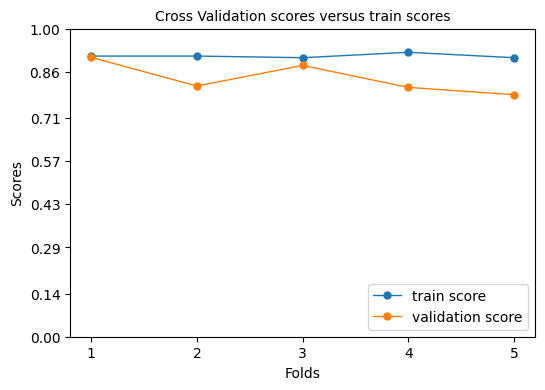

In [9]:
model_func(SVC(), 'Support Vector Classifier (SVC)')

The plot indicates that the SVC generally performs well across different folds, with some variability in the test scores. The train scores are consistently high, suggesting that the model fits the training data well. However, the validation scores show some drop in performance, which might indicate slight overfitting in some folds. The model performed with 91.2% accuracy on the training data across the different folds, 83.9% accuracy on the validation data, indicating its generalization performance. The low standard deviation in the train scores suggests that the model's performance on the training data was very consistent across the folds and The slightly higher standard deviation in the validation scores indicates some variability in the model's performance across different folds, which might be due to differences in the subsets used for validation.

Logistic Regression
--------------------------------
Mean of train scores:	   0.884
Mean of validation scores: 0.858
Std of train scores:	   0.018
Std of validation scores:  0.038



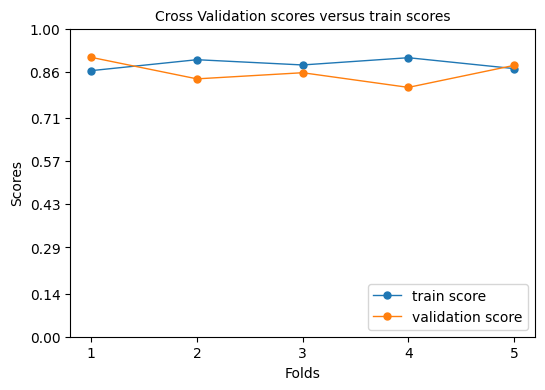

In [10]:
model_func(LogisticRegression(), 'Logistic Regression')

The Logistic Regression model shows good consistency in its training performance, with a mean train score of 0.884 and a low standard deviation of 0.018. The validation scores are slightly lower but still close to the train scores, with a mean validation score of 0.858 and a standard deviation of 0.038, indicating a reliable model performance across different folds. The slight differences between the train and validation scores suggest that the model generalizes well to unseen data.

Random Forest Classifier
--------------------------------
Mean of train scores:	   1.000
Mean of validation scores: 0.816
Std of train scores:	   0.000
Std of validation scores:  0.049



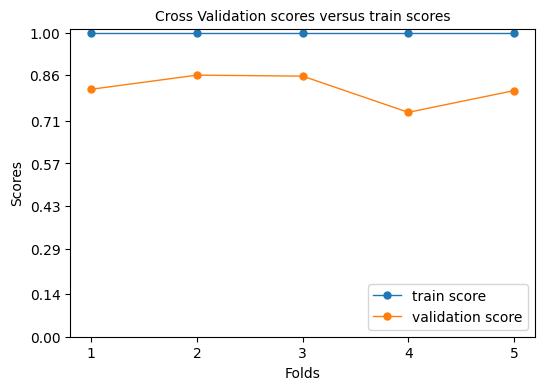

In [11]:
model_func(RandomForestClassifier(random_state=10), 'Random Forest Classifier')

The Random Forest Classifier displays perfect accuracy on the training data across all folds, which could be an indication of overfitting, as the validation scores are consistently lower. With a mean validation score of 0.816 and standard deviation of the validation scores (0.049), the model still generalizes reasonably well, but the gap between the train and validation scores suggests that the model might be too complex or overfitting to the training data.

## GridSearchCV for Hyperparameter Tuning
We will use `GridSearchCV` to optimize the hyperparameters of our models. GridSearchCV is a powerful technique that performs an exhaustive search over a specified parameter grid, evaluating different combinations of hyperparameters to find the best performing model.

In [12]:
def search_scores(gridsearch, model_name):
    """
    This function prints the best hyperparameters, validation score, and evaluation metrics for a given model 
    after performing GridSearchCV.

    Parameters:
    -----------
    gridsearch (GridSearchCV object): The GridSearchCV object containing the results of the hyperparameter search.
    model_name (str): The name of the model being evaluated.

    Prints:
    -------
    - Best hyperparameters selected by GridSearchCV.
    - Best validation score achieved during the search.
    - Evaluation metrics (accuracy, recall, precision, F1 score) on the training data.
    """
    best_params = gridsearch.best_params_
    best_validation_score = gridsearch.best_score_
    y_pred = gridsearch.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    print(model_name)
    print('--'*16)
    print(f'Best hyperparameters:\t{best_params}\nBest validation score:  {best_validation_score:.3f}')
    print(f'Accuracy score:\t\t{accuracy:.3f}\nRecall score:\t\t{recall:.3f}\nPrecision score:\t{precision:.3f}\nf1 score:\t\t{f1:.3f}')
    print('--'*16)


In [13]:
params = {'C':np.linspace(0.01, 1, 10), 'kernel':['rbf', 'linear', 'sigmoid'], 'gamma':np.linspace(0, 1, 10).round(2)}
model = SVC()
search_svc = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=0, n_jobs=-1, return_train_score=True)
search_svc.fit(X_train, y_train)
search_scores(search_svc, 'Support Vector Classifier (SVC)')

Support Vector Classifier (SVC)
--------------------------------
Best hyperparameters:	{'C': 1.0, 'gamma': 0.11, 'kernel': 'rbf'}
Best validation score:  0.878
Accuracy score:		0.920
Recall score:		0.975
Precision score:	0.892
f1 score:		0.932
--------------------------------


GridSearchCV have found tha the best hyperparameter's values for Support Vector Classifier (SVC) are C: 1.0, gamma: 0.11 and kernel: 'rbf'. The C parameter controls the trade-off between achieving a low training error and a low testing error. A value of 1.0 suggests a balanced approach. The gamma parameter defines how far the influence of a single training example reaches, with 0.11 indicating a moderately localized influence. The 'rbf' (Radial Basis Function) kernel is commonly used for non-linear data, which suggests that the decision boundary is non-linear.<br>  

The best cross validation score represents the highest cross-validation accuracy achieved with the optimal hyperparameters during GridSearchCV. An accuracy of 87.8% indicates that the model performs well on unseen data during cross-validation. The accuracy on the training set is 92.0%, which means that 92% of the predictions made by the model on the training data are correct. This high accuracy suggests that the model has learned the training data well. Recall is 97.5%, meaning that the model correctly identifies 97.5% of all true positive cases. Precision is 89.2%, indicating that when the model predicts heart disease, it is correct 89.2% of the time. The F1 score is 93.2%, which is the harmonic mean of precision and recall. It provides a balance between precision and recall, and a high F1 score indicates that the model is performing well in both aspects.

In [14]:
params = {'C':np.linspace(0.01, 10, 20).round(2), 
          'solver': ['liblinear', 'saga', 'lbfgs'],
          'max_iter': [100, 200, 300, 400]}

model = LogisticRegression()
search_lr = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=0, n_jobs=-1, return_train_score=True)
search_lr.fit(X_train, y_train)
search_scores(search_lr, 'Logistic Regression')

Logistic Regression
--------------------------------
Best hyperparameters:	{'C': 0.54, 'max_iter': 100, 'solver': 'liblinear'}
Best validation score:  0.863
Accuracy score:		0.887
Recall score:		0.933
Precision score:	0.874
f1 score:		0.902
--------------------------------


The best values of Logistic Regression's hyperparameters are C:0.54, max_iter:100 and solver:'liblinear'. The best validation score is 86.3%, which is the average score the model achieved during cross-validation. It shows that the model performs well on unseen data, with an accuracy of 86.3%. The model accuracy is 88.7%, which indicates that the model correctly classified 88.7% of the training data. It suggests the model has a good fit on the training set. The high recall indicates that the model is effective at identifying positive cases, with 93.3% of actual positives correctly classified. The precision score suggests that 87.4% of the instances predicted as positive are actually positive, reflecting the model's reliability. The F1 score, which balances precision and recall, is strong at 0.902. This indicates that the model is well-balanced and effective at classifying both positive and negative cases.

In [15]:
params = {'max_depth': [3, 5, 7, 10],
          'min_samples_split': [4, 6, 8],
          'min_samples_leaf': [3, 5, 7],
          'n_estimators': [100, 150, 200]}

model = RandomForestClassifier(random_state=123)
search_rf = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=0, n_jobs=-1, return_train_score=True)
search_rf.fit(X_train, y_train)
search_scores(search_rf, 'Random Forest Classifier')

Random Forest Classifier
--------------------------------
Best hyperparameters:	{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}
Best validation score:  0.849
Accuracy score:		0.892
Recall score:		0.958
Precision score:	0.864
f1 score:		0.908
--------------------------------


The best values for Random Forest Classifier's hyperparameters found by GridSearchCV are max_depth:3, min_samples_split:4, min_samples_leaf:5 and n_estimators:100. The best cross validation score is 84.9%, which is the highest avrage performance score obtained during the cross-validation with the optimal hyperparameters. The accurancy of model on training set is 89.2%, which suggests that the model is very effective at classifying the training data. A recall of 95.8% means the model identifies 95.8% of positive cases (heart disease) correctly, which is excellent for a health-related model where missing positive cases can be critical. A precision of 86.4% suggests that 86.4% of the positive predictions made by the model are accurate, though there might still be some false positives. An F1 score of 90.8% reflects a strong balance between precision and recall, showing that the model performs well in identifying both the presence and absence of the disease.<br>  

## Model Performance Summary
Overall, the three models Support Vector Classifier (SVC), Logistic Regression, and Random Forest Classifier demonstrated strong performance with optimal hyperparameters.

- `Support Vector Classifier (SVC)` achieved the highest validation score of 0.878 and an accuracy score of 0.920 on the training data, indicating a strong performance. However, the slight gap between the validation and accuracy scores suggests potential overfitting, although the high recall and F1 score demonstrate the model's effectiveness in correctly identifying positive cases.
- `Logistic Regression` performed consistently with a validation score of 0.863 and an accuracy score of 0.887. The model showed a good balance between precision and recall, resulting in a solid F1 score of 0.902. This suggests that Logistic Regression is well-calibrated and less prone to overfitting compared to SVC.
- `Random Forest Classifier` had the lowest validation score of 0.849 among the three, with an accuracy score of 0.892. The high recall and decent F1 score indicate that while the model is good at identifying true positives, it might be slightly overfitting due to the gap between the accuracy and validation scores.  


## Model Evaluation
In this section, we evaluate the performance of the three models Support Vector Classifier (SVC), Logistic Regression, and Random Forest Classifier on the test set. Each model has been tuned using GridSearchCV to identify the best hyperparameters. The evaluation metrics used include accuracy, recall, precision, F1 score, confusion matrix, and ROC-AUC score. This comprehensive evaluation will help us understand how well each model generalizes to unseen data and determine which model performs best.

In [16]:
def eval_scores(best_model, model_name):
    """
    Evaluates the performance of the given model on the test set using various metrics and visualizations.

    Parameters:
    ----------
    best_model : GridSearchCV object
        The model object that has been tuned and trained using GridSearchCV.
        
    model_name : str
        The name of the model being evaluated ('Support Vector Classifier', 'Logistic Regression', 'Random Forest Classifier').

    Functionality:
    --------------
    1. Calculates key evaluation metrics including accuracy, recall, precision, F1 score, and ROC-AUC score.
    2. Prints these metrics in a structured format.
    3. Displays the confusion matrix and ROC curve for visual analysis of the model's performance.

    Metrics:
    --------
    - Accuracy: The proportion of correct predictions out of the total predictions made.
    - Recall: The proportion of true positive cases that were correctly identified.
    - Precision: The proportion of positive predictions that were actually correct.
    - F1 Score: The harmonic mean of precision and recall, providing a single metric that balances both concerns.
    - ROC-AUC Score: A measure of the model's ability to distinguish between classes, with 1 being perfect classification 
                     and 0.5 being a random guess.

    Visualizations:
    ---------------
    - Confusion Matrix: A matrix that shows the true positives, true negatives, false positives, and false negatives.
    - ROC Curve: A graphical representation of the true positive rate versus the false positive rate.

    Returns:
    --------
    None
    """
    # Accuracy, recall, precision, F1, roc_auc scores
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    if 'SVC' in model_name:
        y_score = best_model.best_estimator_.decision_function(X_test)
    else:
        y_score = best_model.best_estimator_.predict_proba(X_test)[:, 1]    
    roc_score = roc_auc_score(y_test, y_score)
    
    print(model_name)
    print('--'*16)
    print(f'Accuracy score:\t\t{accuracy:.3f}\nRecall score:\t\t{recall:.3f}\nPrecision score:\t{precision:.3f}\nf1 score:\t\t{f1:.3f}')
    print(f'Roc auc score:\t\t{roc_score:.3f}')
    print('--'*16, '\n')
    
    # Confusion matrix display and roc curve display
    fig, axs = plt.subplots(1, 2, figsize=(10, 4.5))
    cmd = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=['No', 'Yes'], cmap='Blues', ax=axs[0])
    axs[0].set_title('Confusion Matrix', size=11)
    
    roc = RocCurveDisplay.from_estimator(best_model.best_estimator_, X_test, y_test, ax=axs[1])
    diag = plt.plot([0, 1], [0, 1], color='black', linestyle='dashed')
    axs[1].set_title('Receiver Operating Characteristic Curve', size=11)
    plt.tight_layout()
    plt.show()



Support Vector Classifier (SVC)
--------------------------------
Accuracy score:		0.780
Recall score:		0.761
Precision score:	0.795
f1 score:		0.778
Roc auc score:		0.896
-------------------------------- 



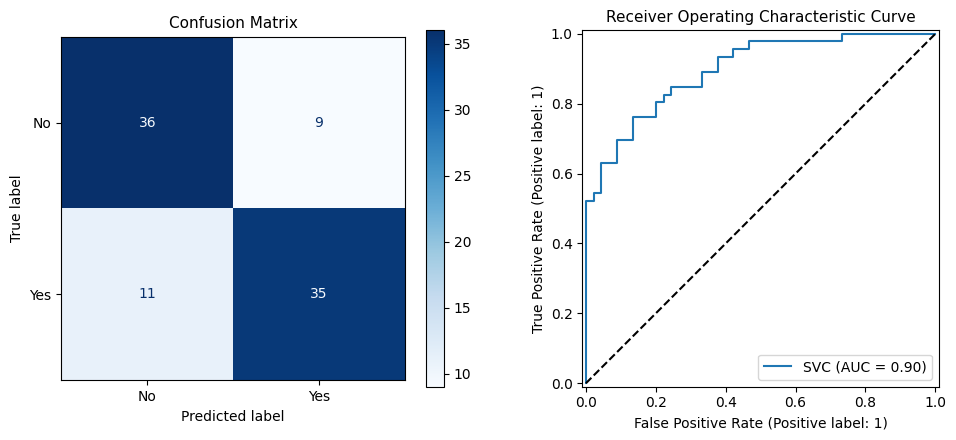

In [17]:
eval_scores(search_svc, 'Support Vector Classifier (SVC)')

The Support Vector Classifier has been evaluated on the test set. The model correctly predicted the outcomes for 78% of the test cases, identified 76.1% of the actual positive cases (true positives) and all the cases the model predicted as positive, 79.5% were actually positive. The model has a good balance between recall and precision. the SVC model can effectively distinguish between positive and negative classes. Overall, the SVC model obtained low accuracy, recall, precision and f1 on test set with a strong discriminatory power as seen on Receiver Operating Characteristic Curve.

Logistic Regression
--------------------------------
Accuracy score:		0.835
Recall score:		0.848
Precision score:	0.830
f1 score:		0.839
Roc auc score:		0.915
-------------------------------- 



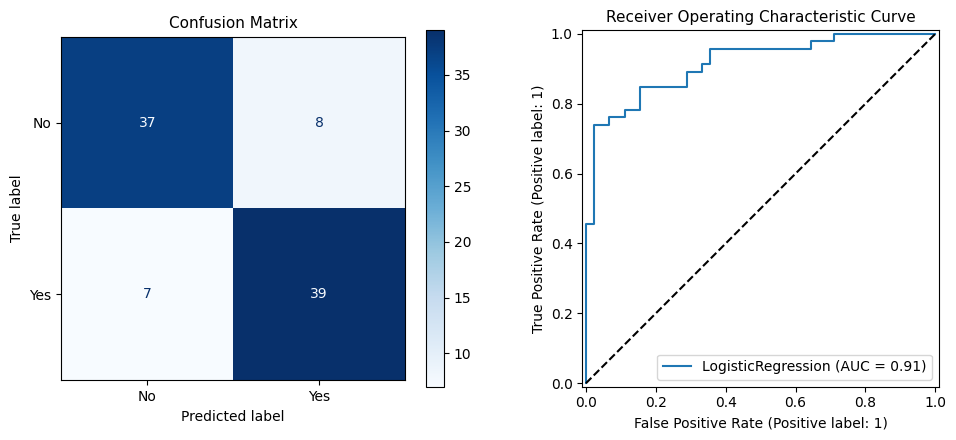

In [18]:
eval_scores(search_lr, 'Logistic Regression')

The Logistic Regression model achieved an accuracy of 83.5% on the test set, correctly identifying 84.8% of actual positive cases (recall) and showing that 83% of the cases it predicted as positive were truly positive (precision). The model also achieved a balanced F1 score of 83.9%, indicating a good trade-off between precision and recall. Additionally, the model demonstrated strong discriminatory power, with a ROC-AUC score of 0.915, reflecting its effectiveness in distinguishing between positive and negative classes.

Random Forest Classifier
--------------------------------
Accuracy score:		0.824
Recall score:		0.848
Precision score:	0.812
f1 score:		0.830
Roc auc score:		0.898
-------------------------------- 



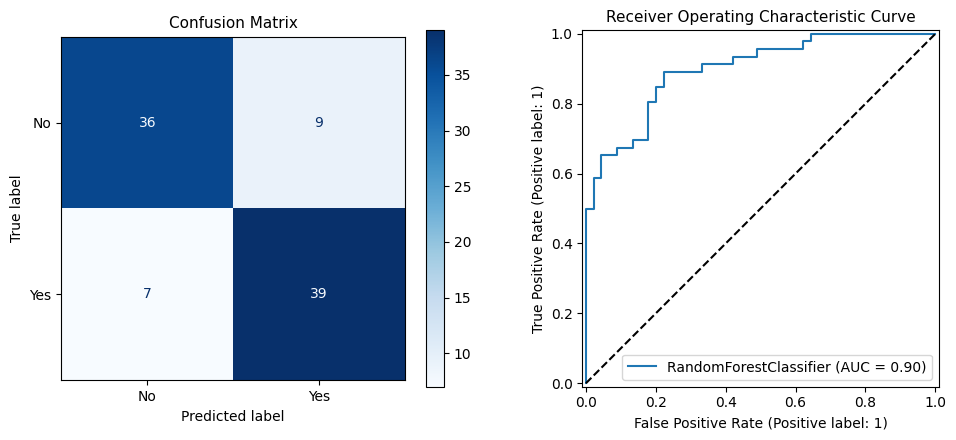

In [19]:
eval_scores(search_rf, 'Random Forest Classifier')

The Random Forest Classifier achieved an accuracy of 82.4% on the test set, with a recall of 84.8%, meaning it correctly identified 84.8% of the actual positive cases. The precision was 81.2%, indicating that 81.2% of the predicted positive cases were truly positive. The F1 score was 83%, showing a solid balance between precision and recall. The model also demonstrated good discriminatory power with a ROC-AUC score of 0.898, reflecting its ability to effectively distinguish between positive and negative classes.

## Model Selection
We evaluated three models Support Vector Classifier (SVC), Logistic Regression, and Random Forest Classifier on the test set. Based on the evaluation results:

- `Logistic Regression` emerged as the best model, demonstrating the highest accuracy (83.5%), recall (84.8%), and ROC-AUC score (0.915). These metrics indicate its strong overall performance and superior ability to distinguish between classes.
- `Random Forest Classifier` also performed well but with slightly lower accuracy (82.4%) and precision compared to Logistic Regression.
- `Support Vector Classifier (SVC)` had lower accuracy and recall compared to the other models.

Thus, Logistic Regression is the preferred model for this problem due to its superior performance metrics.

## Feature Coefficients
The Logistic Regression model has been selected as the best model to predict whether the patient has heart disease or not. Let's find out which features have the highest influence on the model.<br>

In Logistic Regression, feature coefficients represent the strength and direction of the relationship between each feature and the target variable. Positive coefficients increase the likelihood of the outcome being positive, while negative coefficients decrease it. Higher absolute values of coefficients indicate a stronger influence on the model's predictions.<br>

To better understand the impact of each feature, we will review the coefficients obtained from the Logistic Regression model. This will help us identify which features are most influential in predicting heart disease.


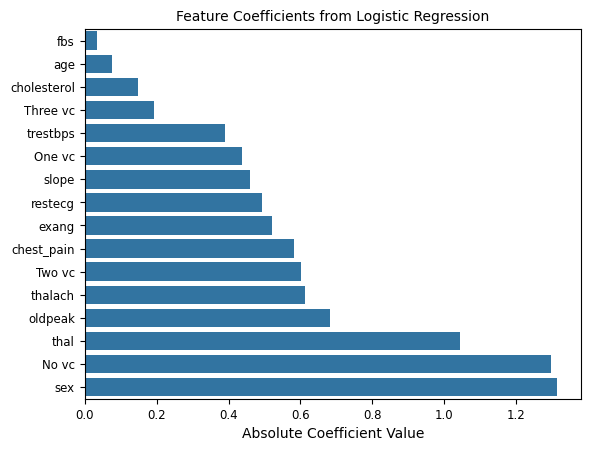

In [20]:
lr = search_lr.best_estimator_
coef = np.abs(lr.coef_)
col_name = X_test.columns
coef_df = pd.DataFrame(coef).T.set_index(col_name).rename(columns={0:'coefficients'}).sort_values(by='coefficients')

sb.barplot(x=coef_df['coefficients'], y=coef_df.index)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel(None)
plt.yticks(size=8.5)
plt.xticks(size=8.5)
plt.title('Feature Coefficients from Logistic Regression', size=10)
plt.show()

__Higher Coefficients:__ Features such as Sex, No vc, and Thalassemia have the highest coefficients, indicating they have the most significant positive impact on the likelihood of heart disease.  
__Moderate Coefficients:__ Features like Oldpeak, Two vc, Max Heart Rate, Chest Pain, exang and restecg also contribute positively but to a lesser extent.  
__Lower Coefficients:__ Features like Age and Fasting Blood Sugar have lower coefficients, suggesting they have a smaller influence on the outcome compared to other features.

## Conclusion
In this analysis, we compared three machine learning models Support Vector Classifier (SVC), Logistic Regression, and Random Forest Classifier for predicting heart disease. Each model was evaluated on the test set using various metrics, including accuracy, recall, precision, F1 score, and ROC-AUC score.

- __Support Vector Classifier (SVC)__ demonstrated strong discriminatory power with a high ROC-AUC score but exhibited signs of overfitting, as indicated by the significant gap between training and validation scores.
- __Logistic Regression__ emerged as the best-performing model overall. It achieved the highest accuracy, recall, and ROC-AUC score, showing a robust ability to distinguish between patients with and without heart disease. This model's coefficients also provided valuable insights into which features have the greatest influence on the outcome.
- __Random Forest Classifier__ performed well but had a slightly lower ROC-AUC score compared to Logistic Regression. It also showed a degree of overfitting, as evidenced by the higher accuracy score on the training set compared to the validation set.

Based on the results, Logistic Regression is the most reliable model for this problem. It balances performance across various metrics and provides interpretable feature coefficients, making it the preferred choice for predicting heart disease. Further improvements could involve refining the model or exploring additional features to enhance prediction accuracy and robustness.
